Изображение загружено успешно. Размер: (112, 1200, 3)


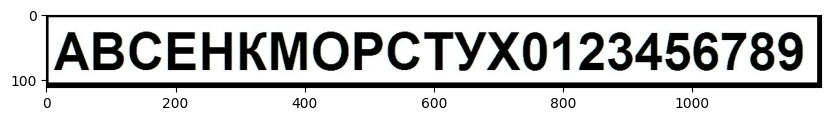

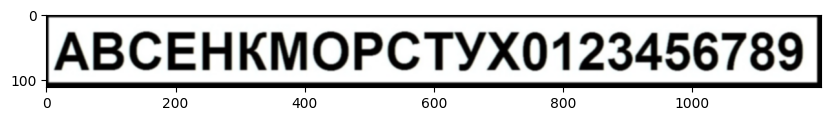

(112, 1200)


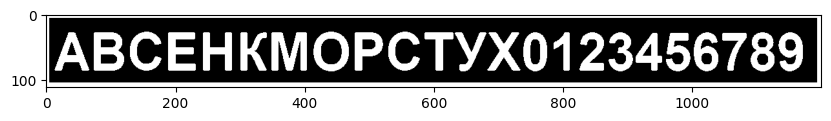

In [97]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
def imshow_rgb(img, figsize = None):
    if figsize is None:
        figsize = (10, 6)
        
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

def imshow_hsv(img):
    rgb_img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
    imshow_rgb(rgb_img)

def imshow_grayscale(img):
    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
    plt.show()

# Проверяем существование файла
picture_files_path = './jpg/'
file1 = picture_files_path + 'dict__.jpg'


dict_img = cv.imread(file1)
    
if dict_img is None:
    print("Ошибка загрузки изображения")
else:
    print(f"Изображение загружено успешно. Размер: {dict_img.shape}")
    imshow_rgb(dict_img)


blurred = cv.GaussianBlur(dict_img, (5, 5), 0)
cv.GaussianBlur(dict_img, (5,5), 0)
imshow_rgb(blurred)

dict_hsv = cv.blur(dict_img, (2, 2))
dict_hsv = cv.cvtColor(dict_hsv, cv.COLOR_BGR2HSV)
dict_mask = cv.inRange(dict_hsv, (0, 0, 0), (255, 255, 141))

print(dict_mask.shape)
imshow_grayscale(dict_mask)

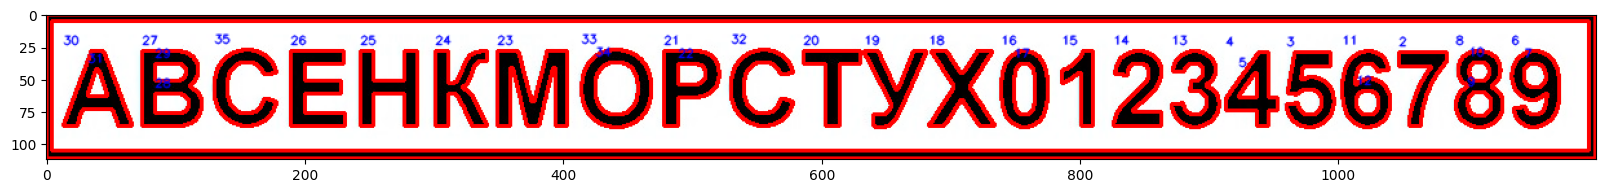

In [105]:
contours, hierarchy = cv.findContours(dict_mask, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
img = dict_img.copy()
cv.drawContours(img, contours, -1, 255, thickness=2)
# 11. Добавление информации о контурах
for i, cnt in enumerate(contours):
    area = cv.contourArea(cnt)
    x, y, w, h = cv.boundingRect(cnt)
    
    if area > 100:  # Фильтрация по площади
        cv.putText(img, f'{i}', (x, y-5),
                    cv.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1, cv.LINE_AA)

imshow_rgb(img, figsize=(20, 12))

In [ ]:
import numpy as np

class Contour:
    def __init__(self, contour):
        complex_contour = self.decartToComplex(contour)
        self._set_countour(complex_contour)

    def _set_countour(self, contour):
        self.contour = contour
        self._contour_length = np.sum(self.get_norm())

    @staticmethod
    def tuple_to_complex(point: tuple) -> complex:
        return complex(point[0][0], point[0][1])
    
    @staticmethod
    def multiplyCVectors(a: np.array, b: np.array) -> np.array:
        return np.sum(a * b.conjugate())
    
    def multiplyTo(self, other: "Contour") -> np.array:
        return Contour.multiplyCVectors(self.contour, other)

    @staticmethod
    def norm(c: np.array):
        return np.sqrt(c * c.conjugate())
    
    def get_norm(self):
        return np.sqrt(Contour.norm(self.contour))
    
    def contour_length(self):
        return self._contour_length
    
    @staticmethod
    def VKF(contour1: "Contour",contour2: "Contour"):
        c1: np.array = contour1.contour
        c2: np.array = contour2.contour

        res = []
        for k in range(c1.shape[0]):
            c2_roll = np.roll(c2, -k)
            res.append(Contour.multiplyCVectors(c1, c2_roll))
        
        return np.array(res)

    def decartToComplex(self, contour):
        compl_contour = [ ]
        last_point = Contour.tuple_to_complex(contour[0])
        for i, point_tuple in enumerate(contour):
            if i == 0:
                continue

            point = Contour.tuple_to_complex(point_tuple)
            compl_contour.append(point - last_point)
            last_point = point

        return np.array(compl_contour)



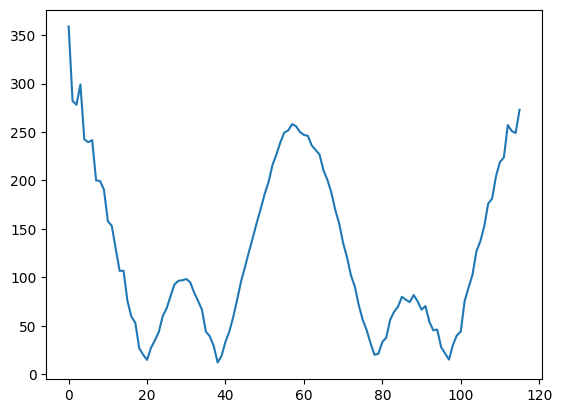

In [143]:
test_countour = Contour(contours[18])
vkf = Contour.VKF(test_countour, test_countour)
m = vkf.shape[0]
plt.plot(np.abs(vkf[:int(m/2)]))
plt.show()

In [101]:
print(len(contours))
print(contours[0])
print(len(contours[0]))
print(contours[0][1])


36
[[[0 0]]

 [[0 1]]

 [[0 2]]

 ...

 [[3 0]]

 [[2 0]]

 [[1 0]]]
2620
[[0 1]]
